In [2]:
!pip install -Uqq fastai duckduckgo_search
!pip install timm

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ypy-websocket 0.8.2 requires aiofiles<23,>=22.1.0, but you have aiofiles 23.2.1 which is incompatible.


In [3]:
from fastcore.all import *
from fastai.vision.all import *

failed=verify_images(get_image_files(Path("/kaggle/working/")))
failed.map(Path.unlink)
len(failed)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0

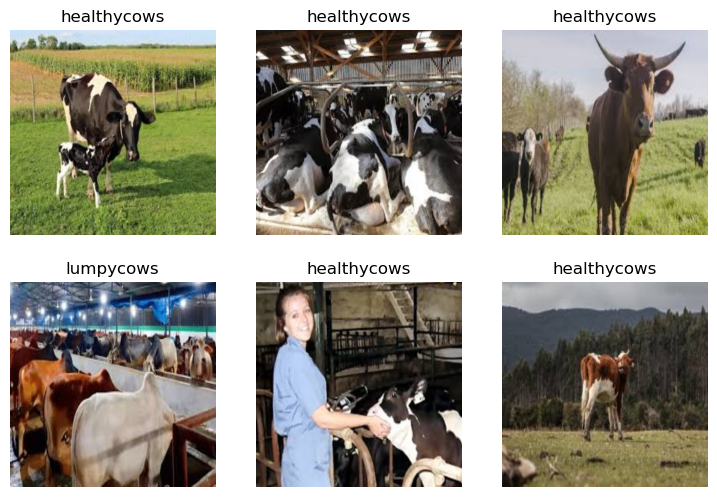

In [4]:
dls=DataBlock(
blocks=(ImageBlock,CategoryBlock),
get_items=get_image_files,
splitter=RandomSplitter(valid_pct=0.2, seed=42),
get_y=parent_label,
item_tfms=[Resize(384, method='squish')],
).dataloaders(Path("/kaggle/input/cow-lumpy-disease-dataset"),bs=32)

dls.show_batch(max_n=6)

In [5]:
learn = vision_learner(dls, resnet50, metrics=error_rate)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 201MB/s] 


In [ ]:
learn.lr_find(suggest_funcs=(valley,slide))

In [ ]:
learn.fine_tune(5, 0.01) 

In [ ]:
def classify_img(path):
    img = PILImage.create(path)
    pred,idx,probs = learn.predict(img)
    return dict(zip(dls.vocab, map(float,probs)))

classify_img('/kaggle/input/cow-lumpy-disease-dataset/lumpycows/img1005.jpg')

In [ ]:
learn.export("cow_disease_model.pkl")